In [488]:
import pandas as pd
import numpy as np
import os
os.getcwd()

'/Users/mikepriorusa/Desktop/ML Class'

## JSON file

#### Reading in the data

In [489]:
#setting the wd
os.chdir('/Users/mikepriorusa/Desktop/ML Class')
import json

In [490]:
#importing the json file
with open("/Users/mikepriorusa/Desktop/ML Class/restuarant_data.json", "r") as f:
    json_data = json.loads(f.read())

In [491]:
#Looking at the end of the data
len(json_data)

479

In [492]:
#we know near the end of the data the format changes, will need to be careful in pulling the data b/c this might
#prevent it from working
json_data[478]

{'message': 'API limit exceeded', 'code': 440, 'status': ''}

In [493]:
#Since length is different here, we can use this length of 3 to signify end of data
len(json_data[478])

3

In [494]:
#testing format and returns
print(json_data[0]['restaurants'][0]['restaurant']['average_cost_for_two'])



1600


In [495]:
#testing format and returns
type(json_data[0]['restaurants'])

list

In [496]:
#pulling out the relevant data into a list of each restaurant and a sublist of relevant data for each restaurant
#will break when the list has length less than 4 because its the end of the data
restaurant_data = []

for lists in json_data:
    if len(lists) < 4:
        break
    for i in lists['restaurants']:
        restaurant_appdata = [i['restaurant']['name'], i['restaurant']['user_rating']['aggregate_rating'],i['restaurant']['user_rating']['votes'], i['restaurant']['price_range'], i['restaurant']['location']['city'],i['restaurant']['location']['latitude'],i['restaurant']['location']['longitude']]
        restaurant_data.append(restaurant_appdata)

        
    

#### Cleaning the data

In [497]:
json_titles = ['restaurant name', 'user rating', 'number of votes', 'price range', 'city', 'latitude', 'longitude']

In [498]:
restaurant_df = pd.DataFrame(restaurant_data, columns=json_titles)
restaurant_df.head(20)

,restaurant name,user rating,number of votes,price range,city,latitude,longitude
0,Hauz Khas Social,4.3,7931,3,New Delhi,28.5542851000,77.1944706000
1,Qubitos - The Terrace Cafe,4.5,778,3,New Delhi,28.6471325000,77.1177015000
2,The Hudson Cafe,4.4,1537,2,New Delhi,28.6949468000,77.2043172000
3,Summer House Cafe,4.1,1823,3,New Delhi,28.5525204000,77.2038090000
4,38 Barracks,4.4,840,3,New Delhi,28.6330248887,77.2228584811
5,Spezia Bistro,4.6,1071,2,New Delhi,28.6948390000,77.2041413000
6,Manhattan Brewery & Bar Exchange,4.6,2093,4,Gurgaon,28.4602710000,77.0950273000
7,The Wine Company,2.4,2412,4,Gurgaon,28.4962285000,77.0890476000
8,Farzi Cafe,4.4,1942,4,New Delhi,28.6323984000,77.2214296000
9,Indian Grill Room,4.5,1262,3,Gurgaon,28.4334574000,77.1052774000


In [499]:
#Putting each column into the right class
restaurant_df.dtypes

restaurant name    object
user rating        object
number of votes    object
price range         int64
city               object
latitude           object
longitude          object
dtype: object

In [500]:
len(restaurant_df.index)

1180

In [501]:
#cleaning the data

In [502]:
restaurant_df['user rating'] = pd.to_numeric(restaurant_df['user rating'])
restaurant_df['price range'] = pd.to_numeric(restaurant_df['price range'])
restaurant_df['longitude'] = pd.to_numeric(restaurant_df['longitude'])
restaurant_df['latitude'] = pd.to_numeric(restaurant_df['latitude'])
restaurant_df['number of votes'] = pd.to_numeric(restaurant_df['number of votes'])

In [503]:
restaurant_df.dtypes

restaurant name     object
user rating        float64
number of votes      int64
price range          int64
city                object
latitude           float64
longitude          float64
dtype: object

#### testing for missing values (I do it in a more uniform format latter on, just testing out things)

In [504]:
testingnas = restaurant_df.isna()
sum(testingnas['user rating'])



0

In [505]:
sum(testingnas['number of votes'])


0

In [506]:
sum(testingnas['price range'])

0

#### Describing the data

In [507]:
restaurant_df.describe().round(2)

,user rating,number of votes,price range,latitude,longitude
count,1180.00,1180.00,1180.00,1180.00,1180.00
mean,3.94,434.84,2.83,14.46,57.65
std,0.74,851.65,0.86,21.61,45.32
min,0.00,0.00,1.00,-41.33,-48.02
25%,3.70,81.00,2.00,0.00,28.05
50%,4.00,177.50,3.00,19.88,75.32
75%,4.30,413.00,3.00,25.62,79.85
max,4.90,10934.00,4.00,73.99,174.83


In [508]:
restaurant_df['city'].value_counts()

London              20
Singapore           20
Edinburgh           20
Ludhiana            20
Goa                 20
Mangalore           20
Patna               20
Rio de Janeiro      20
Puducherry          20
Brasília            20
Pune                20
Bhubaneshwar        20
Vadodara            20
Cape Town           20
Bhopal              20
Ahmedabad           20
Indore              20
Mysore              20
Abu Dhabi           20
Aurangabad          20
Kolkata             20
Kanpur              20
Bangalore           20
Nagpur              20
Varanasi            20
Mumbai              20
Agra                20
Ranchi              20
İstanbul            20
Guwahati            20
                    ..
Vizag               20
Surat               20
Doha                20
Colombo             20
Chennai             20
Pretoria            20
Birmingham          20
Manchester          20
Hyderabad           18
Chandigarh          18
Jakarta             16
New Delhi           15
Sandton    

In [509]:
#I want to see the correlation between user rating, number of votes, and price range
restaurant_df.corr()

,user rating,number of votes,price range,latitude,longitude
user rating,1.000000,0.219499,0.014430,0.045874,0.179965
number of votes,0.219499,1.000000,0.041088,0.076206,0.162515
price range,0.014430,0.041088,1.000000,-0.209529,-0.097244
latitude,0.045874,0.076206,-0.209529,1.000000,-0.005427
longitude,0.179965,0.162515,-0.097244,-0.005427,1.000000


It is interesting to note above that there is a highest correlation between the number of votes and the user rating in a positive direction, suggesting a correlation that is potentially endogenous

In [510]:
restaurant_df.groupby(['city'])['price range'].mean().rank(ascending=False)

city
Abu Dhabi          16.5
Agra               50.5
Ahmedabad          53.5
Allahabad          50.5
Amritsar           74.5
Ankara             42.0
Auckland           22.0
Aurangabad         68.0
Bangalore          47.0
Bhopal             69.0
Bhubaneshwar       74.5
Birmingham         64.5
Bogor              58.0
Brasília           20.0
Cape Town          19.0
Chandigarh         58.0
Chennai            61.5
Coimbatore         64.5
Colombo            39.0
Dehradun           22.0
Doha               10.0
Dubai              22.0
Dummy               5.0
Edinburgh          36.0
Goa                10.0
Gurgaon            12.5
Guwahati           55.5
Hyderabad          37.0
Indore             44.5
Inner City          2.5
                   ... 
Mysore             61.5
Nagpur             67.0
Nashik             42.0
New Delhi          42.0
Panchkula           2.5
Pasay City          2.5
Pasig City         28.5
Patna              61.5
Pretoria            8.0
Puducherry         28.5
Pune       

#### Visualizing the Data (with some cleaning too)

In [511]:
import seaborn as sns

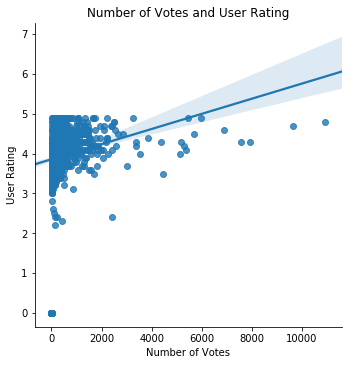

In [512]:
restaurant_lmplot = sns.lmplot(x="number of votes", y="user rating", data=restaurant_df)
restaurant_lmplot.set(xlabel= "Number of Votes", ylabel= "User Rating", title="Number of Votes and User Rating")

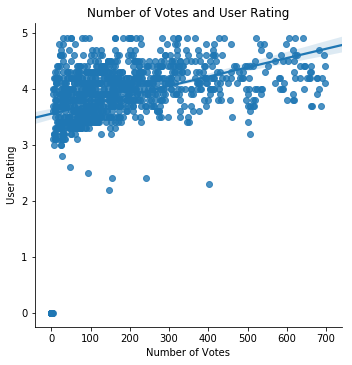

In [513]:
#focusing in on data bunched with lower number of ratings
filteredgraph = restaurant_df[restaurant_df["number of votes"] < 700]
restaurant_lmplot = sns.lmplot(x="number of votes", y="user rating", data=filteredgraph)
restaurant_lmplot.set(xlabel= "Number of Votes", ylabel= "User Rating", title="Number of Votes and User Rating")

I'm going to keep the outliers with a high number of votes as they seem to be accurate of a trend present even when excluded. I will drop the outliers where there is a user rating of 0 because of no votes. I will keep the restaurants even with a few values because it does signify a relationship and could be important

In [514]:
#filtering out null values
restaurant_df = restaurant_df[restaurant_df["number of votes"] !=0 ]

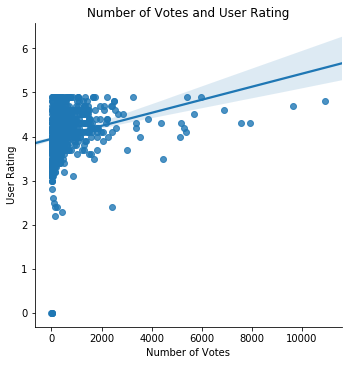

In [515]:
restaurant_lmplot = sns.lmplot(x="number of votes", y="user rating", data=restaurant_df)
restaurant_lmplot.set(xlabel= "Number of Votes", ylabel= "User Rating", title="Number of Votes and User Rating")

[Text(0.5, 0, 'User Rating'), Text(0.5, 1.0, 'User Rating Distribution')]

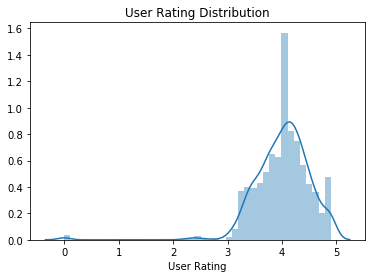

In [516]:
restaurant_dist = sns.distplot(restaurant_df['user rating'], kde=True)
restaurant_dist.set(xlabel="User Rating", title="User Rating Distribution")

rest of the code for the data type involves creating a world map and plotting restaurant locations

In [517]:
#setting up a virtual environment to get Basemap to load ()
import os
os.environ['PROJ_LIB'] = '/Users/mikepriorusa/anaconda3/share/proj'

In [518]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

In [519]:
#setting up to draw the map
from itertools import chain

def draw_map(m, scale=0.2):
    # draw a shaded-relief image
    m.shadedrelief(scale=scale)
    
    # lats and longs are returned as a dictionary
    lats = m.drawparallels(np.linspace(-90, 90, 13))
    lons = m.drawmeridians(np.linspace(-180, 180, 13))

    # keys contain the plt.Line2D instances
    lat_lines = chain(*(tup[1][0] for tup in lats.items()))
    lon_lines = chain(*(tup[1][0] for tup in lons.items()))
    all_lines = chain(lat_lines, lon_lines)
    
    # cycle through these lines and set the desired style
    for line in all_lines:
        line.set(linestyle='-', alpha=0.3, color='w')

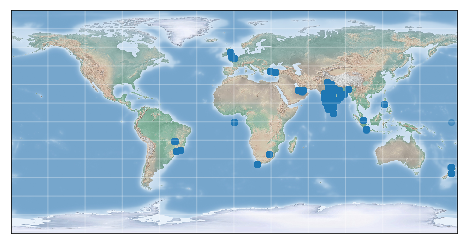

In [520]:
#setting up the world map
fig = plt.figure(figsize=(8, 6), edgecolor='w')
m = Basemap(projection='cyl', resolution=None,
            llcrnrlat=-90, urcrnrlat=90,
            llcrnrlon=-180, urcrnrlon=180, )
draw_map(m)

#adding the datapoints of restaurant locations
lat = restaurant_df['latitude'].values
lon = restaurant_df['longitude'].values
m.scatter(lon, lat, latlon=True,
          cmap='Reds', alpha=0.5)

## Importing the API Data

#### Reading in the Data

In [521]:
#loading in the data using requests
import requests
get_request = requests.get("http://api.population.io/1.0/population/2010/United%20States/?format=json")

In [522]:
#viewing the data
get_request.text

'[{"females": 1966000, "country": "United States", "age": 0, "males": 2054000, "year": 2010, "total": 4019000}, {"females": 1973000, "country": "United States", "age": 1, "males": 2056000, "year": 2010, "total": 4030000}, {"females": 1979000, "country": "United States", "age": 2, "males": 2059000, "year": 2010, "total": 4038000}, {"females": 1983000, "country": "United States", "age": 3, "males": 2061000, "year": 2010, "total": 4043000}, {"females": 1985000, "country": "United States", "age": 4, "males": 2063000, "year": 2010, "total": 4048000}, {"females": 1987000, "country": "United States", "age": 5, "males": 2066000, "year": 2010, "total": 4052000}, {"females": 1988000, "country": "United States", "age": 6, "males": 2069000, "year": 2010, "total": 4057000}, {"females": 1989000, "country": "United States", "age": 7, "males": 2073000, "year": 2010, "total": 4062000}, {"females": 1991000, "country": "United States", "age": 8, "males": 2079000, "year": 2010, "total": 4070000}, {"female

In [523]:
#saving the data
popdata = json.loads(get_request.text)

#### Cleaning the Data

In [524]:
#formatting data into a data frame
popdataframe = pd.DataFrame(popdata)
popdataframe.head()

,age,country,females,males,total,year
0,0,United States,1966000,2054000,4019000,2010
1,1,United States,1973000,2056000,4030000,2010
2,2,United States,1979000,2059000,4038000,2010
3,3,United States,1983000,2061000,4043000,2010
4,4,United States,1985000,2063000,4048000,2010


In [525]:
popdataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 6 columns):
age        101 non-null int64
country    101 non-null object
females    101 non-null int64
males      101 non-null int64
total      101 non-null int64
year       101 non-null int64
dtypes: int64(5), object(1)
memory usage: 4.8+ KB


In [526]:
#testing for missing data
popdataframe.isnull().values.any()

False

In [527]:
#creating a dummy variabel fro age, can be useful in controlling for certain groups in regressions, would just append to end of the dataframe
pd.get_dummies(popdataframe["age"]).head()

,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,100
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [528]:
popdataframe.dtypes

age         int64
country    object
females     int64
males       int64
total       int64
year        int64
dtype: object

In [529]:
#rescaling the data with standardscaler
from sklearn.preprocessing import StandardScaler

In [530]:

standard = StandardScaler()
standard_pop = pd.DataFrame(standard.fit_transform(popdataframe[['females', 'males', 'total']]))
print(np.mean(standard_pop, 0))
print(np.std(standard_pop, 0))

0   -5.276307e-17
1    1.055261e-16
2   -3.847308e-16
dtype: float64
0    1.0
1    1.0
2    1.0
dtype: float64


/Users/mikepriorusa/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/mikepriorusa/anaconda3/lib/python3.7/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [531]:
standard_pop.head()

,0,1,2
0,0.565489,0.657319,0.614001
1,0.575013,0.659770,0.621103
2,0.583177,0.663448,0.626269
3,0.588619,0.665899,0.629497
4,0.591341,0.668351,0.632726


In [532]:
standard_pop.shape

(101, 3)

In [533]:
#creating a new dataframe with standard scale
standard_popdf = pd.concat([popdataframe, standard_pop], axis=1, sort=False)

In [534]:
standard_popdf.head()

,age,country,females,males,total,year,0,1,2
0,0,United States,1966000,2054000,4019000,2010,0.565489,0.657319,0.614001
1,1,United States,1973000,2056000,4030000,2010,0.575013,0.659770,0.621103
2,2,United States,1979000,2059000,4038000,2010,0.583177,0.663448,0.626269
3,3,United States,1983000,2061000,4043000,2010,0.588619,0.665899,0.629497
4,4,United States,1985000,2063000,4048000,2010,0.591341,0.668351,0.632726


In [535]:
standard_popdf = standard_popdf.drop(["females", "males", "total"], axis=1)


In [536]:
standard_popdf.columns = ['age', 'country', 'year', 'females', 'males', 'total']

In [537]:
standard_popdf.head()

,age,country,year,females,males,total
0,0,United States,2010,0.565489,0.657319,0.614001
1,1,United States,2010,0.575013,0.659770,0.621103
2,2,United States,2010,0.583177,0.663448,0.626269
3,3,United States,2010,0.588619,0.665899,0.629497
4,4,United States,2010,0.591341,0.668351,0.632726


#### Describing the Data

In [538]:
#non standard data
pop_data_description=popdataframe.describe()
pop_data_description.round(2)

,age,females,males,total,year
count,101.0,101.00,101.00,101.00,101.0
mean,50.0,1550380.20,1517774.46,3068077.23,2010.0
std,29.3,738639.48,819845.86,1556457.04,0.0
min,0.0,25200.00,4920.00,30100.00,2010.0
25%,25.0,882000.00,726000.00,1607000.00,2010.0
50%,50.0,1989000.00,2044000.00,4038000.00,2010.0
75%,75.0,2088000.00,2142000.00,4234000.00,2010.0
max,100.0,2310000.00,2296000.00,4606000.00,2010.0


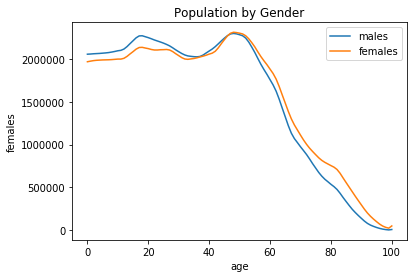

In [539]:
line1 = sns.lineplot(popdataframe.age, popdataframe.males, label='males').set_title('Population by Gender')
line2 = sns.lineplot(popdataframe.age, popdataframe.females, label='females')


## Importing a CSV file into Python

#### Reading in data

In [540]:
#used file instead of URL link because when I tried importing from URL it was having issues with the missing data not loading
freedom_index = pd.read_csv("hfi_cc_2018.csv")


freedom_index dataframe column name definitions:

- year
-  ISO_code
-  countries
-  region
-  pf_rol_proceduralProcedural justice 
-  pf_rol_civilCivil justice
-  pf_rol_criminalCriminal justice
-  pf_rolRule of law
-  pf_ss_homicideHomicide
-  pf_ss_disappearances_disapDisappearances
-  pf_ss_disappearances_violentViolent conflicts
-  pf_ss_disappearances_organizedOrganized conflicts
-  pf_ss_disappearances_fatalitiesTerrorism fatalities
-  pf_ss_disappearances_injuriesTerrorism injuries
-  pf_ss_disappearancesDisappearances, conflict, and terrorism
- pf_ss_women_fgmFemale genital mutilation
- pf_ss_women_missingMissing women
- pf_ss_women_inheritance_widowsInheritance rights for widows
- pf_ss_women_inheritance_daughtersInheritance rights for daughters
- pf_ss_women_inheritanceInheritance
- pf_ss_womenWomen's security
- pf_ssSecurity and safety
- pf_movement_domesticFreedom of domestic movement
- pf_movement_foreignFreedom of foreign movement
- pf_movement_womenWomen's movement
- pf_movementFreedom of movement
- pf_religion_estop_establishFreedom to establish religious organizations
- pf_religion_estop_operateFreedom to operate religious organizations
- pf_religion_estopFreedom to establish and operate religious organizations
- pf_religion_harassmentHarassment and physical hostilities
- pf_religion_restrictionsLegal and regulatory restrictions
- pf_religionReligious freedom
- pf_association_associationFreedom of association
- pf_association_assemblyFreedom of assembly
- pf_association_political_establishFreedom to establish political parties
- pf_association_political_operateFreedom to operate political parties
- pf_association_politicalFreedom to establish and operate political parties
- pf_association_prof_establishFreedom to establish professional organizations
- pf_association_prof_operateFreedom to operate professional organizations
- pf_association_profFreedom to establish and operate professional organizations
- pf_association_sport_establishFreedom to establish educational, sporting, and cultural organizations
- pf_association_sport_operateFreedom to operate educational, sporting, and cultural organizations
- pf_association_sportFreedom to establish and operate educational, sporting, and cultural organizations
- pf_associationFreedom to associate and assemble with peaceful individuals or organizations
- pf_expression_killedPress killed
- pf_expression_jailedPress jailed
- pf_expression_influenceLaws and regulations that influence media content
- pf_expression_controlPolitical pressures and controls on media content
- pf_expression_cableAccess to cable/satellite
- pf_expression_newspapersAccess to foreign newspapers
- pf_expression_internetState control over Internet access
- pf_expressionFreedom of expression
- pf_identity_legalLegal gender
- pf_identity_parental_marriageParental rights in marriage
- pf_identity_parental_divorceParental rights after divorce
- pf_identity_parentalParental rights
- pf_identity_sex_maleMale-to-male relationships
- pf_identity_sex_femaleFemale-to-female relationships
- pf_identity_sexSame-sex ralitionships
- pf_identity_divorceDivorce
- pf_identityIdentity and relationships
- pf_scorePersonal Freedom (score)
- pf_rankPersonal Freedom (rank)
- ef_government_consumptionGovernment consumption
- ef_government_transfersTransfers and subsidies
- ef_government_enterprisesGovernment enterprises and investments
- ef_government_tax_incomeTop marginal income tax rate
- ef_government_tax_payrollTop marginal income and payroll tax rate
- ef_government_taxTop marginal tax rate
- ef_governmentSize of government
- ef_legal_judicialJudicial independence
- ef_legal_courtsImpartial courts
- ef_legal_protectionProtection of property rights
- ef_legal_militaryMilitary interference in rule of law and politics
- ef_legal_integrityIntegrity of the legal system
- ef_legal_enforcementLegal enforcement of contracts
- ef_legal_restrictionsRegulatory restrictions on the sale of real property
- ef_legal_policeReliability of police
- ef_legal_crimeBusiness costs of crime
- ef_legal_genderGender adjustment
- ef_legalLegal system and property rights
- ef_money_growthMoney growth
- ef_money_sdStandard deviation of inflation
- ef_money_inflationInflation: most recent year
- ef_money_currencyFreedom to own foreign currency bank account
- ef_moneySound money
- ef_trade_tariffs_revenueRevenue from trade taxes (% of trade sector)
- ef_trade_tariffs_meanMean tariff rate
- ef_trade_tariffs_sdStandard deviation of tariffs rates
- ef_trade_tariffsTariffs
- ef_trade_regulatory_nontariffNontariff trade barriers
- ef_trade_regulatory_complianceCompliance costs of importing and exporting
- ef_trade_regulatoryRegulatory trade barriers
- ef_trade_blackBlack-market exchange rates
- ef_trade_movement_foreignForeign ownership/investment restrictions
- ef_trade_movement_capitalCapital controls
- ef_trade_movement_visitFreedom of foreigners to visit
- ef_trade_movementControls of the movement of capital and people
- ef_tradeFreedom to trade internationally
- ef_regulation_credit_ownershipOwnership of banks
- ef_regulation_credit_privatePrivate sector credit
- ef_regulation_credit_interestInterest rate controls
- ef_regulation_creditCredit market regulations
- ef_regulation_labor_minwageHiring regulations and minimum wage
- ef_regulation_labor_firingHiring and firing regulations
- ef_regulation_labor_bargainCentralized collective bargaining
- ef_regulation_labor_hoursHours regulations
- ef_regulation_labor_dismissalMandated cost of worker dismissal
- ef_regulation_labor_conscriptionConscription
- ef_regulation_laborLabor market regulations
- ef_regulation_business_admAdministrative requirements
- ef_regulation_business_bureaucracyBureaucracy costs
- ef_regulation_business_startStarting a business
- ef_regulation_business_bribesExtra payments/bribes/favoritism
- ef_regulation_business_licensingLicensing restrictions
- ef_regulation_business_complianceCost of tax compliance
- ef_regulation_businessBusiness regulations
- ef_regulationRegulation
- ef_scoreEconomic Freedom (score)
- ef_rankEconomic Freedom (rank)
- hf_scoreHuman Freedom (score)
- hf_rankHuman Freedom (rank)
- hf_quartileHuman Freedom (quartile)"""

In [541]:
freedom_index.head(10)

,year,ISO_code,countries,region,pf_rol_procedural,pf_rol_civil,pf_rol_criminal,pf_rol,pf_ss_homicide,pf_ss_disappearances_disap,...,ef_regulation_business_bribes,ef_regulation_business_licensing,ef_regulation_business_compliance,ef_regulation_business,ef_regulation,ef_score,ef_rank,hf_score,hf_rank,hf_quartile
0,2016,ALB,Albania,Eastern Europe,6.661503,4.547244,4.666508,5.291752,8.920429,10.0,...,4.050196,7.324582,7.074366,6.705863,6.906901,7.54,34.0,7.568140,48.0,2.0
1,2016,DZA,Algeria,Middle East & North Africa,NaN,NaN,NaN,3.819566,9.456254,10.0,...,3.765515,8.523503,7.029528,5.676956,5.268992,4.99,159.0,5.135886,155.0,4.0
2,2016,AGO,Angola,Sub-Saharan Africa,NaN,NaN,NaN,3.451814,8.060260,5.0,...,1.945540,8.096776,6.782923,4.930271,5.518500,5.17,155.0,5.640662,142.0,4.0
3,2016,ARG,Argentina,Latin America & the Caribbean,7.098483,5.791960,4.343930,5.744791,7.622974,10.0,...,3.260044,5.253411,6.508295,5.535831,5.369019,4.84,160.0,6.469848,107.0,3.0
4,2016,ARM,Armenia,Caucasus & Central Asia,NaN,NaN,NaN,5.003205,8.808750,10.0,...,4.575152,9.319612,6.491481,6.797530,7.378069,7.57,29.0,7.241402,57.0,2.0
5,2016,AUS,Australia,Oceania,8.439110,7.525648,7.364078,7.776279,9.623538,10.0,...,7.238900,8.944387,8.823021,8.121631,8.465526,7.98,10.0,8.582219,4.0,1.0
6,2016,AUT,Austria,Western Europe,8.969832,7.872188,7.673227,8.171749,9.737912,10.0,...,6.418890,7.296116,8.531578,7.419870,7.371334,7.58,27.0,8.413474,16.0,1.0
7,2016,AZE,Azerbaijan,Caucasus & Central Asia,NaN,NaN,NaN,4.270861,9.143499,10.0,...,5.353533,6.959699,7.814181,7.080078,6.874880,6.49,106.0,6.083277,130.0,4.0
8,2016,BHS,Bahamas,Latin America & the Caribbean,6.930835,6.008696,6.262840,6.400790,0.000000,10.0,...,NaN,7.981672,7.388227,7.523034,8.169125,7.34,49.0,7.397269,50.0,2.0
9,2016,BHR,Bahrain,Middle East & North Africa,NaN,NaN,NaN,5.900339,9.790481,10.0,...,6.596745,8.074670,9.680534,8.018774,7.415786,7.56,30.0,6.848035,75.0,2.0


#### Cleaning the data

In [542]:
freedom_index.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458 entries, 0 to 1457
Columns: 123 entries, year to hf_quartile
dtypes: float64(119), int64(1), object(3)
memory usage: 1.4+ MB


In [543]:
#looking to drop excess columns
def keep_cols(DataFrame, keep_these):
    """Keep only the columns [keep_these] in a DataFrame, delete
    all other columns. 
    """
    drop_these = list(set(list(DataFrame)) - set(keep_these))
    return DataFrame.drop(drop_these, axis = 1)

In [544]:
freedom_index2 = keep_cols(freedom_index, ['countries', 'region', 'pf_rol_procedural', 'pf_rol_civil', 'pf_rol_crimina', 'ef_regulation', 'ef_score', 'hf_score'])
freedom_index2.head()                            
                                           

,countries,region,pf_rol_procedural,pf_rol_civil,ef_regulation,ef_score,hf_score
0,Albania,Eastern Europe,6.661503,4.547244,6.906901,7.54,7.568140
1,Algeria,Middle East & North Africa,NaN,NaN,5.268992,4.99,5.135886
2,Angola,Sub-Saharan Africa,NaN,NaN,5.518500,5.17,5.640662
3,Argentina,Latin America & the Caribbean,7.098483,5.791960,5.369019,4.84,6.469848
4,Armenia,Caucasus & Central Asia,NaN,NaN,7.378069,7.57,7.241402


In [545]:
#looking for missing data
freedom_index2.isna().sum()

countries              0
region                 0
pf_rol_procedural    578
pf_rol_civil         578
ef_regulation         80
ef_score              80
hf_score              80
dtype: int64

In [557]:
#there is some strong correlation between the measures so we could predict the missing values but first lets see if they are missing systematically by region
freedom_index2.corr().round(2)

,pf_rol_procedural,pf_rol_civil,ef_regulation,ef_score,hf_score
pf_rol_procedural,1.00,0.81,0.50,0.64,0.87
pf_rol_civil,0.81,1.00,0.49,0.58,0.72
ef_regulation,0.50,0.49,1.00,0.80,0.67
ef_score,0.64,0.58,0.80,1.00,0.85
hf_score,0.87,0.72,0.67,0.85,1.00


In [547]:
#shows that most missing values are from Africa and Asia, with majority of that from Sub-Saharan Africa
freedom_missing_analysis = freedom_index2.isna()
freedom_missing_analysis = keep_cols(freedom_missing_analysis, ['ef_score', 'hf_score', 'ef_regulation', 'pf_rol_civil', 'pf_rol_procedural'])
freedom_missing_analysis = pd.concat([freedom_missing_analysis, freedom_index2['region']], axis=1, sort=False)
freedom_missing_analysis.groupby(['region'])['ef_score', 'hf_score', 'ef_regulation', 'pf_rol_civil', 'pf_rol_procedural'].sum()

,ef_score,hf_score,ef_regulation,pf_rol_civil,pf_rol_procedural
region,,,,,
Caucasus & Central Asia,2.0,2.0,2.0,27.0,27.0
East Asia,0.0,0.0,0.0,9.0,9.0
Eastern Europe,8.0,8.0,8.0,53.0,53.0
Latin America & the Caribbean,2.0,2.0,2.0,71.0,71.0
Middle East & North Africa,21.0,21.0,21.0,95.0,95.0
North America,0.0,0.0,0.0,0.0,0.0
Oceania,0.0,0.0,0.0,18.0,18.0
South Asia,17.0,17.0,17.0,42.0,42.0
Sub-Saharan Africa,30.0,30.0,30.0,218.0,218.0


In [548]:
#looking at the data showed that if the ef_score or hf_score is missing then all the data for that observation is missing so I will drop those
freedom_index3 = freedom_index2[np.isfinite(freedom_index2['ef_score'])]
#perform analysis again
freedom_missing_analysis = freedom_index3.isna()
freedom_missing_analysis = keep_cols(freedom_missing_analysis, ['ef_score', 'hf_score', 'ef_regulation', 'pf_rol_civil', 'pf_rol_procedural'])
freedom_missing_analysis = pd.concat([freedom_missing_analysis, freedom_index3['region']], axis=1, sort=False)
freedom_missing_analysis.groupby(['region'])['ef_score', 'hf_score', 'ef_regulation', 'pf_rol_civil', 'pf_rol_procedural'].sum()

,ef_score,hf_score,ef_regulation,pf_rol_civil,pf_rol_procedural
region,,,,,
Caucasus & Central Asia,0.0,0.0,0.0,25.0,25.0
East Asia,0.0,0.0,0.0,9.0,9.0
Eastern Europe,0.0,0.0,0.0,45.0,45.0
Latin America & the Caribbean,0.0,0.0,0.0,69.0,69.0
Middle East & North Africa,0.0,0.0,0.0,74.0,74.0
North America,0.0,0.0,0.0,0.0,0.0
Oceania,0.0,0.0,0.0,18.0,18.0
South Asia,0.0,0.0,0.0,25.0,25.0
Sub-Saharan Africa,0.0,0.0,0.0,188.0,188.0


I know this could be an ideal situation for using prediction to fill in the missing values for civil and procedural ranking but for the sake of time since I have spent about 15 hours on this already I will simply drop the additional missing values. If I was actually going to run some tests, this would be a problem as there appears to be a systematic missing of the values by region. 

In [549]:
#drop the remaining missing values
freedom_index4 = freedom_index3.dropna()


#### Describing the data

In [550]:
freedom_index4['region'].value_counts()

Latin America & the Caribbean    163
Sub-Saharan Africa               160
Eastern Europe                   145
Western Europe                   117
South Asia                       111
Middle East & North Africa        76
East Asia                         45
Caucasus & Central Asia           27
North America                     18
Oceania                           18
Name: region, dtype: int64

In [551]:
freedom_index4.describe()

,pf_rol_procedural,pf_rol_civil,ef_regulation,ef_score,hf_score
count,880.000000,880.000000,880.000000,880.000000,880.000000
mean,5.589355,5.474770,7.029575,6.912034,7.156146
std,2.080957,1.428494,1.012731,0.815263,0.950261
min,0.000000,0.000000,2.483540,2.880000,4.200724
25%,4.133333,4.549550,6.437246,6.390000,6.554292
50%,5.300000,5.300000,7.067094,7.020000,7.045297
75%,7.389499,6.410975,7.718077,7.440000,8.008114
max,9.700000,8.773533,9.439828,9.190000,9.126313


In [552]:
freedom_index4.groupby(['region'])['ef_score', 'hf_score'].mean()

,ef_score,hf_score
region,,
Caucasus & Central Asia,7.212593,7.039625
East Asia,7.505778,7.748487
Eastern Europe,6.994483,7.563180
Latin America & the Caribbean,6.698528,7.025885
Middle East & North Africa,6.702105,6.228316
North America,7.956667,8.461915
Oceania,8.208333,8.735377
South Asia,6.714505,6.594615
Sub-Saharan Africa,6.348313,6.406842


In [553]:
freedom_index4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 880 entries, 0 to 1457
Data columns (total 7 columns):
countries            880 non-null object
region               880 non-null object
pf_rol_procedural    880 non-null float64
pf_rol_civil         880 non-null float64
ef_regulation        880 non-null float64
ef_score             880 non-null float64
hf_score             880 non-null float64
dtypes: float64(5), object(2)
memory usage: 55.0+ KB


In [554]:
#could concatenate these dummies onto the end of our dataset if running a regression to control for region FE
freedom_dummies = pd.get_dummies(freedom_index4['region'])
freedom_dummies.head()

,Caucasus & Central Asia,East Asia,Eastern Europe,Latin America & the Caribbean,Middle East & North Africa,North America,Oceania,South Asia,Sub-Saharan Africa,Western Europe
0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0
5,0,0,0,0,0,0,1,0,0,0
6,0,0,0,0,0,0,0,0,0,1
8,0,0,0,1,0,0,0,0,0,0


#### Visualizing the data

/Users/mikepriorusa/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


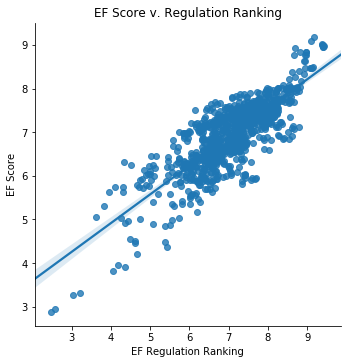

In [555]:
#this evidences the strong correlation shown earlier
scatter_pop = sns.lmplot(x="ef_regulation", y="ef_score", data=freedom_index4)
scatter_pop.set(ylabel='EF Score', xlabel='EF Regulation Ranking', title="EF Score v. Regulation Ranking")

Text(0.5, 1.0, 'Regulation Rankings by Region')

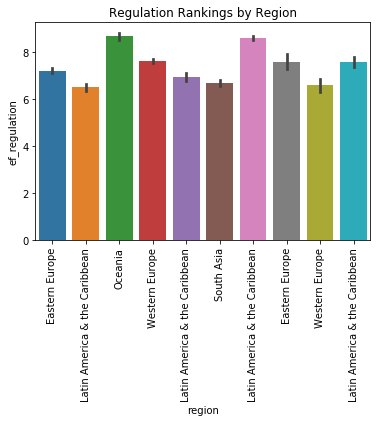

In [556]:
g=sns.barplot(freedom_index4.region, freedom_index4['ef_regulation'])
g.set_xticklabels(labels= freedom_index4['region'], rotation=90)
g.set_title("Regulation Rankings by Region")
